# 🧪Simulation-Based Hypothesis Testing

This notebook is a **deeper dive** into p-values using simulation.

Check the introduction notebook ***p_value_simulation_tutorial*** , where p-values were introduced intuitively. Here, I:

- Run simulations under different alternative distributions
- Test **left-sided** and **right-sided** hypotheses
- Explore how **changing the mean or variance** affects p-value behavior
- Test when assumptions (e.g., normality) are wrong

This is how you go from *knowing* what a p-value is, to actually *understanding* what it does.

🎓 Statistical Testing with P-values.

In hypothesis testing, we ask:
Is the observed data consistent with what we’d expect under a specific model?
To do that, we rely on test statistics, assumptions, and the concept of a p-value.

📚 Key Definitions
μ (mu): The true population mean under the null hypothesis (H₀).

σ (sigma): The known standard deviation of the population.

x̄ (x-bar): The sample mean, i.e., what you actually observed in your experiment.

n: The sample size.

z-statistic: A standardized score. Used when σ is known and the sample is large or the population is normal.

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

rng = np.random.default_rng(seed=313)

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


## 🛠 P-value Functions

In [2]:
def pval(x, mu, sigma):
    n = len(x)
    x_bar = np.mean(x)
    z = np.sqrt(n) * (x_bar - mu)/sigma
    return 1 - stats.halfnorm.cdf(np.abs(z))

def pval_left(x, mu, sigma):
    n = len(x)
    x_bar = np.mean(x)
    z = np.sqrt(n) * (x_bar - mu)/sigma
    return 1 - stats.norm.cdf(z)

def pval_right(x, mu, sigma):
    n = len(x)
    x_bar = np.mean(x)
    z = np.sqrt(n) * (x_bar - mu)/sigma
    return stats.norm.cdf(z)

## 📊 Case Study: Smaller Mean, Same Sigma (Left-sided Test)

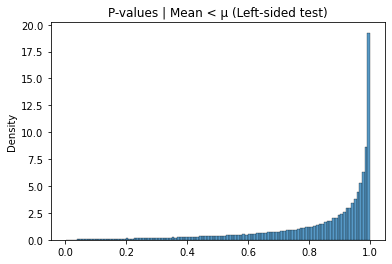

In [3]:
n, mu, sigma = 20, 1, np.pi
n_reps = 100000
xx = rng.normal(0, sigma, (n_reps, n))
pvals = np.apply_along_axis(pval_left, 1, xx, mu=mu, sigma=sigma)
sns.histplot(x=pvals, stat='density')
plt.title('P-values | Mean < μ (Left-sided test)')
plt.show()

## 📊 Case Study: Smaller Sigma, Same Mean

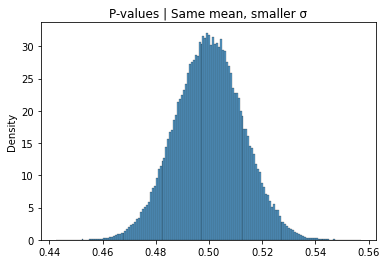

Share of p-values ≥ 0.95: 0.0


In [4]:
xx = rng.normal(1, 0.1, (n_reps, n))
pvals = np.apply_along_axis(pval_left, 1, xx, mu=mu, sigma=sigma)
sns.histplot(x=pvals, stat='density')
plt.title('P-values | Same mean, smaller σ')
plt.show()
print('Share of p-values ≥ 0.95:', np.mean(pvals >= 0.95))

## 📊 Case Study: Large Mean and Sigma (Right-sided Test)

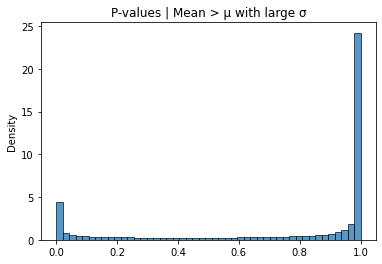

P(p ≤ 0.05): 0.11446
P(p ≤ 0.01): 0.07844


In [5]:
xx = rng.normal(2.5, np.pi**2, (n_reps, n))
pvals = np.apply_along_axis(pval_right, 1, xx, mu=mu, sigma=sigma)
sns.histplot(x=pvals, stat='density')
plt.title('P-values | Mean > μ with large σ')
plt.show()
print('P(p ≤ 0.05):', np.mean(pvals <= 0.05))
print('P(p ≤ 0.01):', np.mean(pvals <= 0.01))

## 🧪 Alternative Distribution: Log-normal

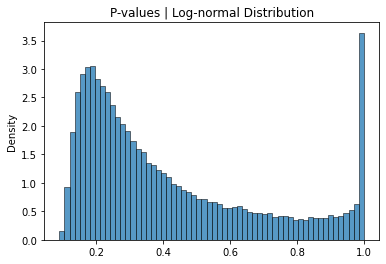

P(p ≤ 0.05): 0.0


In [6]:
def f_lnorm(size):
    return rng.lognormal(-2, 2, size)

xx = f_lnorm((n_reps, n))
pvals = np.apply_along_axis(pval_right, 1, xx, mu=mu, sigma=sigma)
sns.histplot(x=pvals, stat='density')
plt.title('P-values | Log-normal Distribution')
plt.show()
print('P(p ≤ 0.05):', np.mean(pvals <= 0.05))

## 🧪 Alternative Distribution: Gumbel

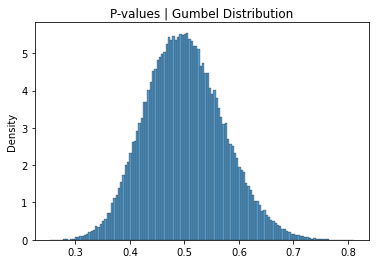

P(p ≤ 0.05): 0.0


In [7]:
beta = np.sqrt(0.2)
mu_g = 1 - np.euler_gamma * beta
def f_gumbel(size):
    return rng.gumbel(mu_g, beta, size)

xx = f_gumbel((n_reps, n))
pvals = np.apply_along_axis(pval_right, 1, xx, mu=mu, sigma=sigma)
sns.histplot(x=pvals, stat='density')
plt.title('P-values | Gumbel Distribution')
plt.show()
print('P(p ≤ 0.05):', np.mean(pvals <= 0.05))

## ✅ Summary:
- P-values change depending on whether you're testing left-sided, right-sided, or two-sided hypotheses.
- The distribution of p-values tells you **how often you'd reject H₀** under different scenarios.
- Sampling from the wrong distribution (e.g. Log-normal) can make classical tests misleading.
- Simulation is your best friend when formulas fail or assumptions are shaky.


## 🌍 Real-World Applications


| Field         | Question                                              | Test Used   |
| ------------- | ----------------------------------------------------- | ----------- |
| Healthcare    | Is the treatment reducing symptoms more than placebo? | Right-sided |
| Manufacturing | Are part dimensions deviating from specification?     | Two-sided   |
| Marketing     | Is Ad B performing better than Ad A?                  | Right-sided |
| Finance       | Are returns statistically better than benchmark?      | Right-sided |
| Public Policy | Is a program reducing crime below the historic mean?  | Left-sided  |
